# Goodreads analysis

This is an analysis beased on a dataset of Goodreads data downloaded from Kaggle.
This data set contains information of book title, author, average rating, isbn, languange, pages, numbers of reviews received, number of text review recieved, publication day, and publisher.
Ccolumn names are 'bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'.

The key questions I would like to answer through analysis include:
1. More and more books published? Changes on numbers of books published through time;
2. Most productive author: The author has the highest number of published books;
3. Which book is the best? The book has the highest average rating (with and without adjusted by number of reviews);
4. Which book received the most reviews?
5. Underrated gem: which book has a high rating but few reviews;
6. Which author has a overall highest rating?
7. Is there a correlation between the length of book and rating/number of reviews
To answer the above questions, I will first check general statistic of this database, then address questions one by one.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import the dataset as dataframe
file_path = r"C:\Users\yama4971\Desktop\kaggle\books.xlsx"
df = pd.read_excel(file_path)
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')


In [3]:
#delete the space in column names and droped the last empty column
df.columns = df.columns.str.strip()
df = df.drop(df.columns[-1], axis=1)
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [4]:
#count how many records 
num_rows = len(df.index)
print("Number of rows excluding column names:", num_rows)

Number of rows excluding column names: 11127


In [5]:
#check if any NA value exsits
any_missing_values = df.isna().any().any()
print(any_missing_values)

False


In [6]:
#find duplicated books existing in the dataset, filter by book title and author
duplicated_records = df[df.duplicated(subset=['title', 'authors'], keep=False)]
num_duplicated_records = df['title'].duplicated(keep=False).sum()
print(duplicated_records)
print(num_duplicated_records)

       bookID                                              title  \
9          14  The Hitchhiker's Guide to the Galaxy (Hitchhik...   
12         21               A Short History of Nearly Everything   
13         22                        Bill Bryson's African Diary   
22         31  The Lord of the Rings (The Lord of the Rings  ...   
23         34  The Fellowship of the Ring (The Lord of the Ri...   
...       ...                                                ...   
11046   45314                                 Kafka on the Shore   
11047   45316                                 Sputnik Sweetheart   
11066   45414         The Locked Room (The New York Trilogy  #3)   
11084   45485          The Subtle Knife (His Dark Materials  #2)   
11100   45536                                        On the Road   

                              authors average_rating        isbn  \
9                       Douglas Adams           4.22  1400052920   
12                        Bill Bryson          

In [7]:
#for duplicated record, only keep the record with the highest number of ratings_count
sorted_df = df.sort_values(by='ratings_count', ascending=False)
duplicated_mask = sorted_df.duplicated(subset=['title', 'authors'], keep='first')
filtered_df = sorted_df[~duplicated_mask]
num_rows_filtered = len(filtered_df.index)
print("Number of rows after filtered", num_rows_filtered)

Number of rows after filtered 10816


In [8]:
#from now on, I will only use the filtered dataframe for analysis, in total 10816 books
#count how many languages of books involved
language_counts = filtered_df['language_code'].value_counts()
print(language_counts)

eng              8679
en-US            1360
spa               207
en-GB             198
fre               140
ger                96
jpn                46
mul                19
zho                14
grc                11
por                10
en-CA               7
ita                 5
9780000000000       4
enm                 3
lat                 3
swe                 2
rus                 2
tur                 1
ara                 1
ale                 1
nor                 1
nl                  1
glg                 1
msa                 1
gla                 1
wel                 1
srp                 1
Name: language_code, dtype: int64


In [9]:
#search for rows with the language code being 9780000000000 
rows_with_wrong_language = filtered_df[filtered_df['language_code'] == 9780000000000]
print(rows_with_wrong_language)

      bookID                                              title  \
4702   16914                  The Tolkien Fan's Medieval Reader   
5877   22128                     Patriots (The Coming Collapse)   
3348   12224  Streetcar Suburbs: The Process of Growth in Bo...   
8979   34889  Brown's Star Atlas: Showing All The Bright Sta...   

                                       authors  \
4702  David E. Smith (Turgon of TheOneRing.net   
5877                              James Wesley   
3348                           Sam Bass Warner   
8979                                     Brown   

                                         average_rating  isbn      isbn13  \
4702   one of the founding members of this Tolkien w...  3.58  1593600119   
5877                                             Rawles  3.63  156384155X   
3348                                  Jr./Sam B. Warner  3.58   674842111   
8979                                     Son & Ferguson     0   851742718   

      language_code num_pag

In [10]:
#these four records have wrong inputs. need to delete one column and then move all the columns behind one step forward
rows_with_wrong_language['average_rating'] = np.nan
for col in range(4, len(rows_with_wrong_language.columns)):
    rows_with_wrong_language.iloc[:, col - 1] = rows_with_wrong_language.iloc[:, col]
print(rows_with_wrong_language)

      bookID                                              title  \
4702   16914                  The Tolkien Fan's Medieval Reader   
5877   22128                     Patriots (The Coming Collapse)   
3348   12224  Streetcar Suburbs: The Process of Growth in Bo...   
8979   34889  Brown's Star Atlas: Showing All The Bright Sta...   

                                       authors average_rating        isbn  \
4702  David E. Smith (Turgon of TheOneRing.net           3.58  1593600119   
5877                              James Wesley           3.63  156384155X   
3348                           Sam Bass Warner           3.58   674842111   
8979                                     Brown              0   851742718   

             isbn13 language_code  num_pages  ratings_count  \
4702  9780000000000           eng        400             26   
5877  9780000000000           eng        342             38   
3348  9780000000000         en-US        236             61   
8979  9780000000000       

C:\Users\yama4971\AppData\Local\Temp\ipykernel_11508\3209200227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_wrong_language['average_rating'] = np.nan
C:\Users\yama4971\AppData\Local\Temp\ipykernel_11508\3209200227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_wrong_language.iloc[:, col - 1] = rows_with_wrong_language.iloc[:, col]
C:\Users\yama4971\AppData\Local\Temp\ipykernel_11508\3209200227.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will atte

In [11]:
#copy the updated record back to the dtaframe used for analysis
up_filtered_df = filtered_df.copy()
index_values = rows_with_wrong_language.index.tolist()
print(index_values)
for row in index_values:
    up_filtered_df.loc[row] = rows_with_wrong_language.loc[row]
#Key:update the index after filtering!    
up_filtered_df = up_filtered_df.reset_index(drop=True)
print(up_filtered_df[up_filtered_df['bookID']==3348])

[4702, 5877, 3348, 8979]
      bookID           title                        authors average_rating  \
7929    3348  The Cod's Tale  Mark Kurlansky/S.D. Schindler           3.91   

           isbn         isbn13 language_code num_pages  ratings_count  \
7929  399234764  9780000000000           eng        48            127   

      text_reviews_count     publication_date  \
7929                  25  2001-09-10 00:00:00   

                                       publisher  
7929  G.P. Putnam's Sons Books for Young Readers  


## desciptive plot of the dataset

In [12]:
# check the data type in the column of 'publication_date'
set(up_filtered_df['publication_date'].apply(type))
# there is wrong data type, probably wrong date input

{datetime.datetime, str}

In [13]:
#find cells that are not datetime type
import datetime
for i in range(0,len(up_filtered_df['publication_date'])):
    if type(up_filtered_df.loc[i,'publication_date']) is datetime.datetime:
        continue
    else:
        print(i,up_filtered_df.loc[i,'publication_date'])               

1885 11/31/2000
9902 6/31/1982


In [14]:
# replace the date of row 1885, 9902 with right date
import datetime
up_date_df = up_filtered_df.copy()
up_date_df['publication_date'] = pd.to_datetime(up_date_df['publication_date'], errors='coerce')
indices_with_nat = up_date_df[up_date_df['publication_date'].isna()].index.tolist()
# Replace the wrong dates with the correct ones
for idx, correct_date in zip(indices_with_nat, [pd.Timestamp('2000-11-30'), pd.Timestamp('1982-06-30')]):
    up_date_df.at[idx, 'publication_date'] = correct_date
print(up_date_df.loc[1885],up_date_df.loc[9902])
# counting for plot
up_date_df['year'] = pd.to_datetime(up_date_df['publication_date']).dt.year
year_counts = up_date_df['year'].value_counts().sort_index()

bookID                                                            31373
title                 In Pursuit of the Proper Sinner (Inspector Lyn...
authors                                               Elizabeth  George
average_rating                                                      4.1
isbn                                                          553575104
isbn13                                                    9780000000000
language_code                                                       eng
num_pages                                                           718
ratings_count                                                     10608
text_reviews_count                                                  295
publication_date                                    2000-11-30 00:00:00
publisher                                                  Bantam Books
Name: 1885, dtype: object bookID                                                          45531
title                     Montaillou  vi

In [15]:
#plot the number of books each year
# Plotting
print(year_counts.index.min(),year_counts.index.max())

1900 2020


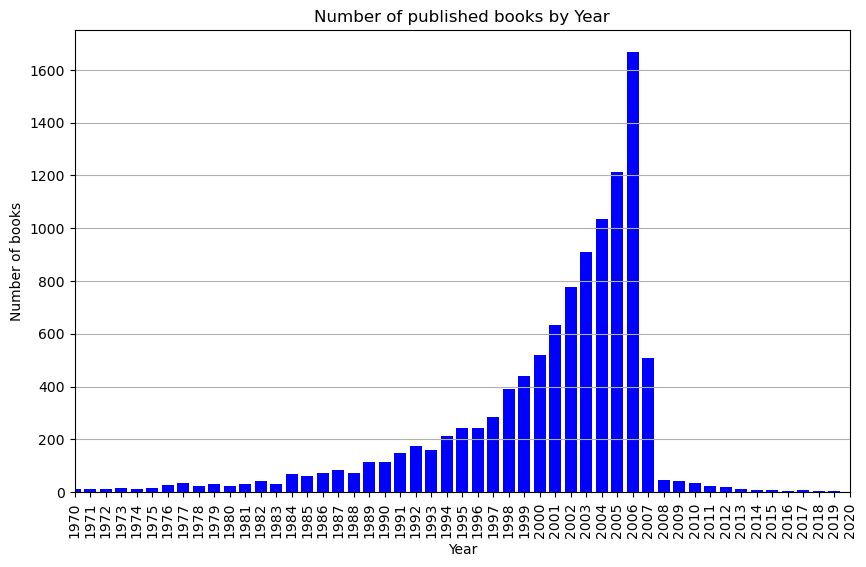

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='blue')

plt.xlabel('Year')
plt.ylabel('Number of books')
plt.title('Number of published books by Year')
plt.xticks(year_counts.index, rotation='vertical')  # Show each year as a tick mark on the x-axis
plt.grid(axis='y')
plt.xlim(1970, 2020)

plt.show()

## highest rating book

In [17]:
# First, without adjusting with number of reviews
highest_rating = up_date_df['average_rating'].max()
highest_rating_book = up_date_df[up_date_df['average_rating'] == highest_rating]
num_book_highest = len(highest_rating_book.index)
print("there are",num_book_highest,"books with highest rating of", highest_rating, highest_rating_book)


there are 22 books with highest rating of 5        bookID                                              title  \
10422   17224  The Diamond Color Meditation: Color Pathway to...   
10453   17830  Bulgakov's the Master and Margarita: The Text ...   
10516    2843  Literature Circle Guide: Bridge to Terabithia:...   
10541   19786  The Goon Show  Volume 4: My Knees Have Fallen ...   
10617   36853                 Tyrannosaurus Wrecks (Stanley  #1)   
10622   19788  The Goon Show  Volume 11: He's Fallen in the W...   
10637   39829  His Princess Devotional: A Royal Encounter Wit...   
10645   14741  Zone of the Enders: The 2nd Runner Official St...   
10648    4287  Middlesex Borough (Images of America: New Jersey)   
10660   20954                                Winchester Shotguns   
10661   23552                        The New Big Book of America   
10666   36492  Oliver Wendell Holmes in Paris: Medicine  Theo...   
10679    2560                  Willem de Kooning: Late Paintings   
1068

In [18]:
# Then adjust the rating with number of reviews
## I use Bayesian average to adjust the rating
def bayesian_average(C, M, N, R):
    """
    Calculate the Bayesian average.

    Parameters:
    C (float): Constant, representing the weight of the prior belief.
    M (float): Prior belief or mean rating across all items.
    N (int): Number of reviews for the specific item.
    R (float): Average rating for the specific item.

    Returns:
    float: Adjusted rating based on Bayesian average.
    """
    return (C * M + N * R) / (C + N)

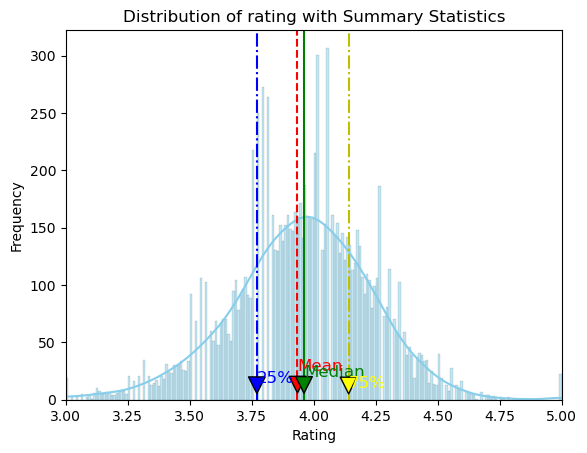

In [19]:
# To set values of C, N, need to get statistics in rating and number of rating
# mean rating across all items and distribution
import seaborn as sns
rating = up_date_df['average_rating']
# Create the histogram and KDE plot
sns.histplot(rating, bins=500, kde=True, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of rating with Summary Statistics")
# Calculate statistics
mean = np.mean(rating)
median = np.median(rating)
percentile_25 = np.percentile(rating, 25)
percentile_75 = np.percentile(rating, 75)

# Add lines and annotations for statistics
plt.axvline(mean, color='r', linestyle='--')
plt.annotate('Mean', xy=(mean, 5), xytext=(mean, 25),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.axvline(median, color='g', linestyle='-')
plt.annotate('Median', xy=(median, 5), xytext=(median, 20),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

plt.axvline(percentile_25, color='b', linestyle='-.')
plt.annotate('25%', xy=(percentile_25, 5), xytext=(percentile_25, 15),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=12, color='blue')

plt.axvline(percentile_75, color='y', linestyle='-.')
plt.annotate('75%', xy=(percentile_75, 5), xytext=(percentile_75, 10),
             arrowprops=dict(facecolor='yellow', shrink=0.05),
             fontsize=12, color='yellow')
plt.xlim(3,5)
# Show the plot
plt.show()


In [20]:
print("mean:",mean, "\n", "median:", median, "\n"
     "percentile_25:", percentile_25,"\n",
     "percentile_75:", percentile_75)

mean: 3.9337527736686386 
 median: 3.96 
percentile_25: 3.77 
 percentile_75: 4.14


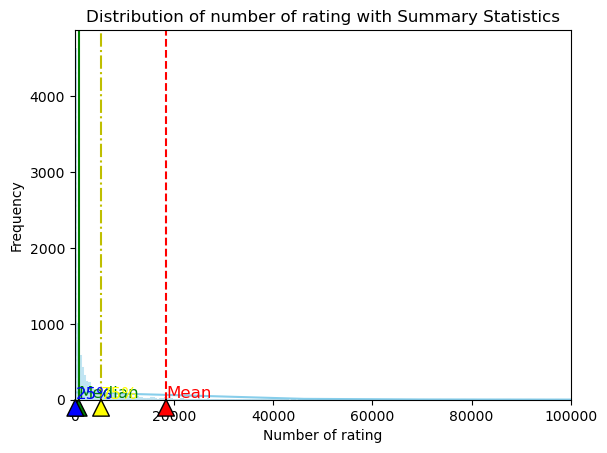

mean: 18401.516087278105 
 median: 785.5 
percentile_25: 108.0 
 percentile_75: 5296.5


In [21]:
# mean number of rating across all items and distribution
num_rating = up_date_df['ratings_count']
# Create the histogram and KDE plot
sns.histplot(num_rating, bins=10000,kde=True, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel("Number of rating")
plt.ylabel("Frequency")
plt.title("Distribution of number of rating with Summary Statistics")
# Calculate statistics
num_mean = np.mean(num_rating)
num_median = np.median(num_rating)
num_percentile_25 = np.percentile(num_rating, 25)
num_percentile_75 = np.percentile(num_rating, 75)

# Add lines and annotations for statistics
plt.axvline(num_mean, color='r', linestyle='--')
plt.annotate('Mean', xy=(num_mean, 5), xytext=(num_mean, 25),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.axvline(num_median, color='g', linestyle='-')
plt.annotate('Median', xy=(num_median, 5), xytext=(num_median, 20),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green')

plt.axvline(num_percentile_25, color='b', linestyle='-.')
plt.annotate('25%', xy=(num_percentile_25, 5), xytext=(num_percentile_25, 15),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=12, color='blue')

plt.axvline(num_percentile_75, color='y', linestyle='-.')
plt.annotate('75%', xy=(num_percentile_75, 5), xytext=(num_percentile_75, 10),
             arrowprops=dict(facecolor='yellow', shrink=0.05),
             fontsize=12, color='yellow')
# Show the plot
plt.xlim(0,100000)

plt.show()
print("mean:",num_mean, "\n", "median:", num_median, "\n"
     "percentile_25:", num_percentile_25,"\n",
     "percentile_75:", num_percentile_75)


In [22]:
# M is to be mean value of rating
# compare the results of bayesian average with C value to be median and 25 percentile
M = mean
C_median = num_mean
C_percentile_25 = num_percentile_25
N = up_date_df['ratings_count']
R = up_date_df['average_rating']
up_date_df["adj_rating_median"] = pd.to_numeric(bayesian_average(C_median, M, N, R))
up_date_df['adj_rating_25'] = pd.to_numeric(bayesian_average(C_percentile_25, M, N, R))

In [23]:
top_10_highest_median = up_date_df.nlargest(10,'adj_rating_median')
top_10_highest_25 = up_date_df.nlargest(10,'adj_rating_25')
print(up_date_df.loc[top_10_highest_median.index,['title','average_rating','adj_rating_median','ratings_count']])
print(up_date_df.loc[top_10_highest_25.index,['title','average_rating','adj_rating_25','ratings_count']])

                                                 title average_rating  \
9    Harry Potter and the Half-Blood Prince (Harry ...           4.57   
4    Harry Potter and the Prisoner of Azkaban (Harr...           4.56   
768  Harry Potter Boxed Set  Books 1-5 (Harry Potte...           4.78   
921                     The Complete Calvin and Hobbes           4.82   
347  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...           4.59   
6    Harry Potter and the Order of the Phoenix (Har...           4.49   
312                                  The Complete Maus           4.55   
676       The Calvin and Hobbes Tenth Anniversary Book           4.63   
56          The Two Towers (The Lord of the Rings  #2)           4.44   
313  Fullmetal Alchemist  Vol. 1 (Fullmetal Alchemi...            4.5   

     adj_rating_median  ratings_count  
9             4.564462        2095690  
4             4.555113        2339585  
768           4.519723          41428  
921           4.497794          3221

Use median value as C seems more reseanable.To choose a proper value for C, we can do A/B tet here.

# # underrated gem

In [24]:
#which book has a high rating but few reviews
#can use the result from bayesian average. 
#after adjusting by number of reviews, few reviews can make the high rating close to mean rating, forming a big gap between the rating and the adjusted rating
up_date_df['rating_gap'] = pd.to_numeric(up_date_df['average_rating']-up_date_df["adj_rating_median"]) 
top_10_highest_gap = up_date_df.nlargest(10,'rating_gap')
print(up_date_df.loc[top_10_highest_gap.index,['title','average_rating','adj_rating_median','rating_gap','ratings_count']])

                                                   title average_rating  \
10766  The American Campaign: U.S. Presidential Campa...              5   
10770  Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...              5   
10815         Bill Gates: Computer Legend (Famous Lives)              5   
10666  Oliver Wendell Holmes in Paris: Medicine  Theo...              5   
10679                  Willem de Kooning: Late Paintings              5   
10683  The Complete Theory Fun Factory: Music Theory ...              5   
10686       Fanning the Flame: Bible  Cross  and Mission              5   
10703  Colossians and Philemon: A Critical and Exeget...              5   
10709      The Irish Anatomist: A Study of Flann O'Brien              5   
10729  Delwau Duon: Peintiadau Nicholas Evans = Symph...              5   

       adj_rating_median  rating_gap  ratings_count  
10766           3.933753    1.066247              0  
10770           3.933753    1.066247              0  
10815       

# # book receiving the most reviews

In [25]:
top_10_most_review = up_date_df.nlargest(10,'ratings_count')
print(up_date_df.loc[top_10_most_review.index,['title','average_rating','adj_rating_median','ratings_count']])

                                               title average_rating  \
0                            Twilight (Twilight  #1)           3.59   
1                The Hobbit  or There and Back Again           4.27   
2                             The Catcher in the Rye            3.8   
3               Angels & Demons (Robert Langdon  #1)           3.89   
4  Harry Potter and the Prisoner of Azkaban (Harr...           4.56   
5  Harry Potter and the Chamber of Secrets (Harry...           4.42   
6  Harry Potter and the Order of the Phoenix (Har...           4.49   
7  The Fellowship of the Ring (The Lord of the Ri...           4.36   
8                                        Animal Farm           3.93   
9  Harry Potter and the Half-Blood Prince (Harry ...           4.57   

   adj_rating_median  ratings_count  
0           3.591370        4597666  
1           4.267573        2530894  
2           3.800994        2457092  
3           3.890330        2418736  
4           4.555113        

# # The most productive author

In [27]:
# make a new dataframe containing only columns of title, authors, and adj_rating_median
author_df = up_date_df[['title', 'authors', 'adj_rating_median']].copy()
print(author_df.head())

                                               title  \
0                            Twilight (Twilight  #1)   
1                The Hobbit  or There and Back Again   
2                             The Catcher in the Rye   
3               Angels & Demons (Robert Langdon  #1)   
4  Harry Potter and the Prisoner of Azkaban (Harr...   

                       authors  adj_rating_median  
0              Stephenie Meyer           3.591370  
1               J.R.R. Tolkien           4.267573  
2                J.D. Salinger           3.800994  
3                    Dan Brown           3.890330  
4  J.K. Rowling/Mary GrandPrÃ©           4.555113  


In [48]:
# make a copy of the book to each author if multiple authors exist, then delete the original line
#define a new dataframe to store the new information
author_df_new = pd.DataFrame(data=[], columns=['title', 'authors', 'adj_rating_median'])
for i in range(len(author_df)):
    authors = author_df.loc[i,'authors']
    if '/' in authors:
        split_authors = authors.split('/')
        for au in split_authors:
            add_row = pd.DataFrame({'title':author_df.loc[i,'title'],'authors':au, 'adj_rating_median':author_df.loc[i,'adj_rating_median']}, index=[0])
            author_df_new = pd.concat([author_df_new, add_row],ignore_index=True)
    else:
        add_row = pd.DataFrame({'title':author_df.loc[i,'title'],'authors':author_df.loc[i,'authors'], 'adj_rating_median':author_df.loc[i,'adj_rating_median']}, index=[0])                        
        author_df_new = pd.concat([author_df_new, add_row],ignore_index=True)                     
print(author_df_new.head(10))


                                               title          authors  \
0                            Twilight (Twilight  #1)  Stephenie Meyer   
1                The Hobbit  or There and Back Again   J.R.R. Tolkien   
2                             The Catcher in the Rye    J.D. Salinger   
3               Angels & Demons (Robert Langdon  #1)        Dan Brown   
4  Harry Potter and the Prisoner of Azkaban (Harr...     J.K. Rowling   
5  Harry Potter and the Prisoner of Azkaban (Harr...   Mary GrandPrÃ©   
6  Harry Potter and the Chamber of Secrets (Harry...     J.K. Rowling   
7  Harry Potter and the Chamber of Secrets (Harry...   Mary GrandPrÃ©   
8  Harry Potter and the Order of the Phoenix (Har...     J.K. Rowling   
9  Harry Potter and the Order of the Phoenix (Har...   Mary GrandPrÃ©   

   adj_rating_median  
0           3.591370  
1           4.267573  
2           3.800994  
3           3.890330  
4           4.555113  
5           4.555113  
6           4.416131  
7           

In [49]:
# count how many books for each author
book_counts = author_df_new['authors'].value_counts()
top_10_book_counts = book_counts.head(10)
print(top_10_book_counts)

William Shakespeare    91
Stephen King           84
J.R.R. Tolkien         50
Sandra Brown           47
P.G. Wodehouse         46
Agatha Christie        45
Roald Dahl             44
Mercedes Lackey        43
Orson Scott Card       42
James Patterson        41
Name: authors, dtype: int64


# # Highest rated author

In [52]:
# use the median rating as author's rating
# Group the DataFrame by 'authors' and calculate the median rating
author_df_new['adj_rating_median'] = pd.to_numeric(author_df_new['adj_rating_median'], errors='coerce')
median_rating = author_df_new.groupby('authors')['adj_rating_median'].median().reset_index()
df_sorted_desc = median_rating.sort_values('adj_rating_median', ascending=False)
print(df_sorted_desc.head(10))

                        authors  adj_rating_median
5831             Mary GrandPrÃ©           4.502505
4483                  Jon Stone           4.369798
6100         Michael J. Smollin           4.369798
1038  Cao XuÃ¢n Viá»‡t KhÆ°Æ¡ng           4.364769
3510                 Isle Lasch           4.333901
817              Bill Watterson           4.330499
2937               George Pratt           4.330289
7777             Ruth E. Harper           4.310065
6358              Nancy M. Leak           4.310065
606                 Audrey Penn           4.310065


In [47]:
print(author_df.sort_values('adj_rating_median', ascending=False).head(10))

                                                 title  \
9    Harry Potter and the Half-Blood Prince (Harry ...   
4    Harry Potter and the Prisoner of Azkaban (Harr...   
768  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
921                     The Complete Calvin and Hobbes   
347  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...   
6    Harry Potter and the Order of the Phoenix (Har...   
312                                  The Complete Maus   
676       The Calvin and Hobbes Tenth Anniversary Book   
56          The Two Towers (The Lord of the Rings  #2)   
313  Fullmetal Alchemist  Vol. 1 (Fullmetal Alchemi...   

                            authors  adj_rating_median  
9       J.K. Rowling/Mary GrandPrÃ©           4.564462  
4       J.K. Rowling/Mary GrandPrÃ©           4.555113  
768     J.K. Rowling/Mary GrandPrÃ©           4.519723  
921                  Bill Watterson           4.497794  
347                  J.R.R. Tolkien           4.489060  
6       J.K. Rowlin

# # Correlation between the length of book and number of text reviews

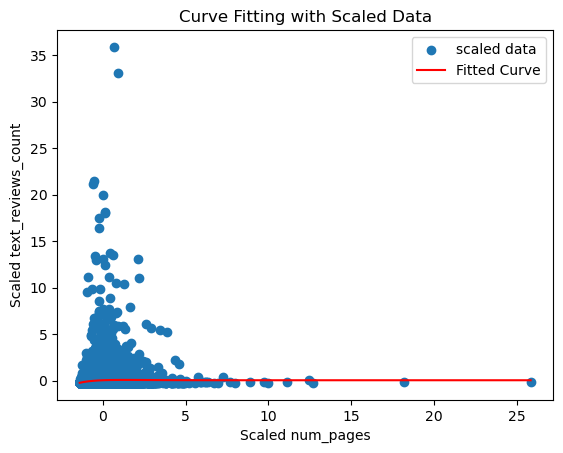

In [104]:
#scatterplot pages vs number of count of text review
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler

#define a exponential function
#Which regression model to choose depend on the shape of the scatterplot
def fit_func(x, a, b,c,d):
    return a*x/np.exp(b*x+c)+d

#scale the data
scaler_x = StandardScaler()
scaler_y = StandardScaler()
up_date_df['x_scaled'] = scaler_x.fit_transform(up_date_df[['num_pages']])
up_date_df['y_scaled'] = scaler_y.fit_transform(up_date_df[['text_reviews_count']])

#Fit the scaled data using curve_fit
initial_guess = [1,1,1,1]
params, _ = curve_fit(fit_func, up_date_df['x_scaled'], up_date_df['y_scaled'], p0=initial_guess)

# Generate fitted y-values
x = np.linspace(up_date_df['x_scaled'].min(), up_date_df['x_scaled'].max(), 100)
y = reciprocal_func(x, *params)
up_date_df['y_fit_scaled'] = fit_func(up_date_df['x_scaled'], *params)

# Plot the scaled data and fitted curve
plt.scatter(up_date_df['x_scaled'], up_date_df['y_scaled'], label='scaled data')
plt.plot(x, y, label='Fitted Curve', color='red')
plt.legend()
plt.xlabel('Scaled num_pages')
plt.ylabel('Scaled text_reviews_count')
plt.title('Curve Fitting with Scaled Data')
plt.show()


In [102]:
params

array([0.25052176, 0.75336898, 1.28945007, 0.03455379])

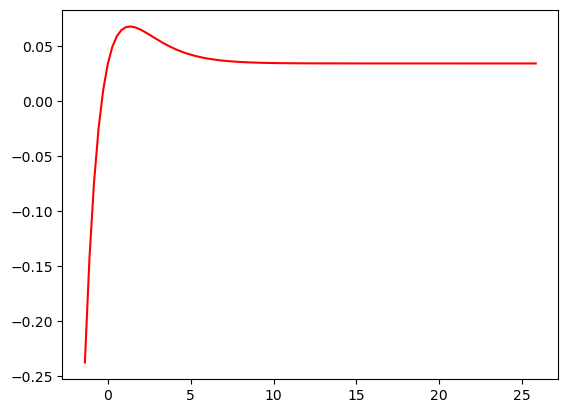

In [103]:
plt.plot(x, y, label='Fitted Curve', color='red')
plt.show()

No obvious correlation found